In [ ]:
import os  
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import matplotlib.dates as mdates
from datetime import datetime

In [ ]:
dfs = pd.read_csv('altaeros_flight_data_20230128_185513.csv')
dfs['Time'] = pd.to_datetime(dfs['Time'])


In [ ]:
dfs.head(5)

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_SAN_mPs,wind_direction_air_SAN_deg,wind_elevation_air_SAN_deg,wind_speed_air_CVA_mPs,wind_direction_air_CVA_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC
0,2023-01-28 18:55:13,245.015607,1214.031080,742.302742,648.327765,2.290360,158.576433,6.911678,247.505460,-0.142063,7.938795,236.131253,41.364775,5.997483,101381.572923,37.913133,8.738045
1,2023-01-28 18:55:13,245.035782,1205.277038,705.097848,633.306118,2.289475,158.433607,7.020596,247.136616,-2.290779,7.953460,236.938367,41.370879,6.021898,101425.519577,37.903977,8.783822
2,2023-01-28 18:55:13,245.035782,1201.749018,700.279306,645.771278,2.289475,158.433607,7.183989,246.684039,-2.024446,7.957416,237.069501,41.364775,6.006639,101425.519577,37.903977,8.783822
3,2023-01-28 18:55:13,245.028624,1208.538985,686.109391,642.911755,2.287796,158.521500,7.513913,247.226766,-2.344396,7.935520,235.581000,41.370879,5.988328,101479.232153,37.937547,8.783822
4,2023-01-28 18:55:13,245.041626,1215.576747,669.181680,652.421804,2.286972,158.488540,7.569265,247.210831,-2.277023,7.643284,289.602016,41.355619,6.028002,101488.998076,37.913133,8.768563


In [ ]:
dfs.shape

(12000, 17)

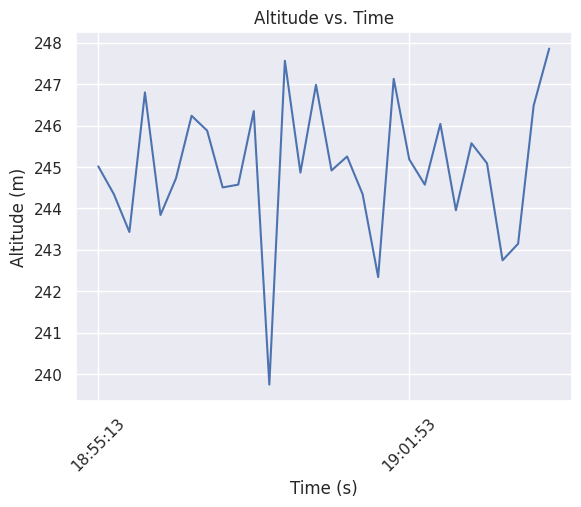

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# #Altitiude 
altitude = dfs['altitude_m'].iloc[0::400]  
time = dfs['Time'].iloc[0::400]

# Convert times to datetime objects   
time = [t.strftime("%d-%b-%Y %H:%M:%S") for t in time]     
time = [datetime.strptime(t, "%d-%b-%Y %H:%M:%S") for t in time]
# Plot the data
plt.figure()    
plt.plot(time, altitude)

# Set x ticks to show hours:minutes:seconds
plt.xticks(time[::20], ["%d:%02d:%02d" % (t.hour, t.minute, t.second) for t in time[::20]], rotation=45)

plt.xlabel("Time (s)")  
plt.ylabel("Altitude (m)")
plt.title("Altitude vs. Time")

# Show plot
plt.show() 

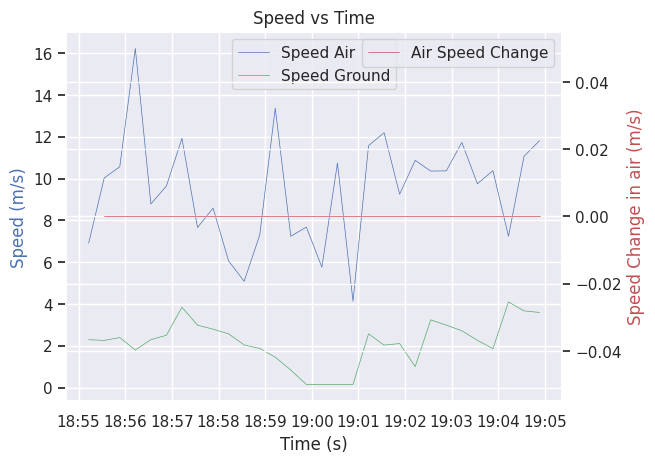

In [ ]:
#SPEED VS TIME
# Calculate difference between consecutive data points 
speedair = dfs['wind_speed_air_SAN_mPs'].iloc[0::400]
time = dfs['Time'].iloc[0::400]  
speedground = dfs['wind_speed_ground_NED_mPs'].iloc[0::400]
#Calculate rate of change of speed
dfs['speed_diff_air'] = dfs['wind_speed_air_SAN_mPs'].diff()
speeddiff=dfs['speed_diff_air'].iloc[0::400]
fig, ax1 = plt.subplots()
# Plot original speed vs time on primary y-axis
ax1.plot(time, speedair, color='b', linewidth=0.5, label='Speed Air')
ax1.plot(time, speedground, color='g', linewidth=0.5, label='Speed Ground')
ax1.set_ylabel('Speed (m/s)', color='b')

# Create secondary y-axis
ax2 = ax1.twinx()
# Plot difference on secondary y-axis 
ax2.plot(time, speeddiff, color='r', linewidth=0.5, label='Air Speed Change')
ax2.set_ylabel('Speed Change in air (m/s)', color='r')

ax1.set_xlabel('Time (s)')
ax1.set_title('Speed vs Time')
ax1.legend(loc="upper center")
ax2.legend(loc="upper right")
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# Show plot  
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Load the dataset
# data_path = 'altaeros_flight_data_20230128_185513.csv'
# data = pd.read_csv(data_path)

# # Define and filter the relevant features
# relevant_features = [
#     'wind_speed_air_SAN_mPs', 
#     'wind_direction_air_SAN_deg', 
#     'wind_elevation_air_SAN_deg', 
#     'humidity_air_pct', 
#     'temperature_air_degC', 
#     'altitude_m'
# ]
# filtered_data = data[relevant_features]

# # Calculate the wind speed difference for every 20th second
# filtered_data['wind_speed_diff_20s'] = filtered_data['wind_speed_air_SAN_mPs'].diff(periods=20).fillna(0)

# # Create a binary target variable based on the threshold
# filtered_data['gust'] = (filtered_data['wind_speed_diff_20s'].abs() > 1).astype(int)

# # Normalize the features
# X = filtered_data.drop(columns=['gust', 'wind_speed_diff_20s'])
# y = filtered_data['gust']
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Create sequences
# sequence_length = 60

# def create_sequences(data, target, sequence_length):
#     x_sequences = []
#     y_sequences = []
#     for i in range(len(data) - sequence_length):
#         x_sequences.append(data[i:i+sequence_length])
#         y_sequences.append(target[i+sequence_length])
#     return np.array(x_sequences), np.array(y_sequences)

# X_sequences, y_sequences = create_sequences(X_scaled, y.values, sequence_length)

# # Randomly sample 20 sequences
# sample_indices = np.random.choice(len(X_sequences), 20, replace=False)
# X_sample = X_sequences[sample_indices]
# y_sample = y_sequences[sample_indices]

# X_sample, y_sample

2023-08-11 00:47:17.453194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 00:47:17.764986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-11 00:47:17.765016: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-11 00:47:17.797786: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-11 00:47:19.617433: W tensorflow/stream_executor/platform/de

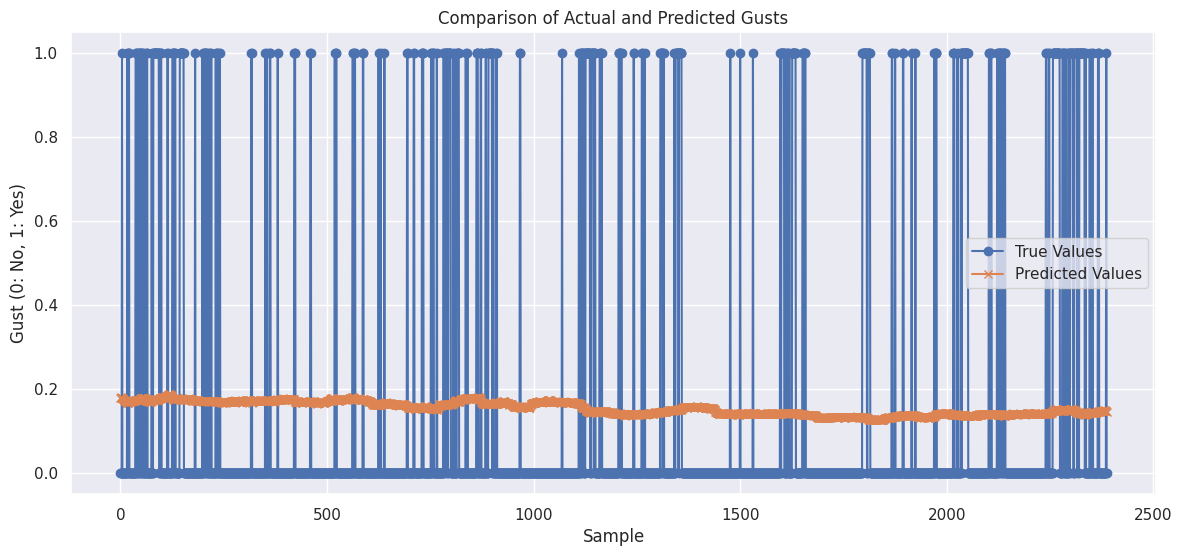

In [ ]:
# Consolidated code for data loading, preprocessing, LSTM model training, and visualization

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'altaeros_flight_data_20230128_185513.csv'
data = pd.read_csv(data_path)

# Filter and process the data
relevant_features = [
    'wind_speed_air_SAN_mPs', 
    'wind_direction_air_SAN_deg', 
    'wind_elevation_air_SAN_deg', 
    'humidity_air_pct', 
    'temperature_air_degC', 
    'altitude_m'
]
filtered_data = data[relevant_features]
filtered_data['wind_speed_diff_20s'] = filtered_data['wind_speed_air_SAN_mPs'].diff(periods=20).fillna(0)
filtered_data['gust'] = (filtered_data['wind_speed_diff_20s'].abs() > 1).astype(int)

# Normalize the features
X = filtered_data.drop(columns=['gust', 'wind_speed_diff_20s'])
y = filtered_data['gust']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
sequence_length = 60

def create_sequences(data, target, sequence_length):
    x_sequences = []
    y_sequences = []
    for i in range(len(data) - sequence_length):
        x_sequences.append(data[i:i+sequence_length])
        y_sequences.append(target[i+sequence_length])
    return np.array(x_sequences), np.array(y_sequences)

X_sequences, y_sequences = create_sequences(X_scaled, y.values, sequence_length)

# Data Splitting
train_size = int(0.8 * len(X_sequences))
X_train, y_train = X_sequences[:train_size], y_sequences[:train_size]
X_test, y_test = X_sequences[train_size:], y_sequences[train_size:]

# # Model Building and Compilation
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Model Training
# model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), shuffle=False)


# Simplified Model Building and Compilation
model = Sequential()
model.add(LSTM(30, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Model Training with fewer epochs, larger batch size, and early stopping
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop], shuffle=False)
# Predict on the test data
y_pred = model.predict(X_test)

# Visual comparison
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Comparison of Actual and Predicted Gusts')
plt.ylabel('Gust (0: No, 1: Yes)')
plt.xlabel('Sample')
plt.legend()
plt.grid(True)
plt.show()

# LSTM Model for Gusts

/tmp/ipykernel_85/1949965690.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['wind_speed_diff_20s'] = filtered_data['wind_speed_air_SAN_mPs'].diff(periods=20).fillna(0)
Epoch 1/110
299/299 [==============================] - 11s 34ms/step - loss: 0.0160 - val_loss: 0.0121
Epoch 2/110
299/299 [==============================] - 10s 32ms/step - loss: 0.0110 - val_loss: 0.0125
Epoch 3/110
299/299 [==============================] - 10s 32ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 4/110
299/299 [==============================] - 10s 32ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 5/110
299/299 [==============================] - 10s 32ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 6/110
299/299 [==============================] 

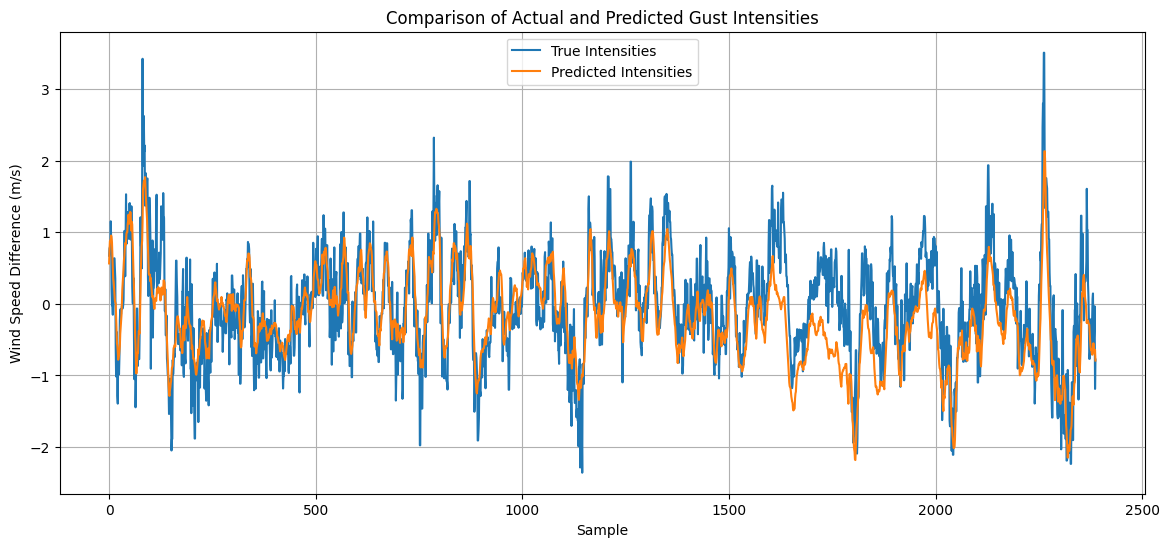

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Data loading
data_path ='altaeros_flight_data_20230128_185513.csv'
data = pd.read_csv(data_path)

# Define and filter the relevant features
relevant_features = [
    'wind_speed_air_SAN_mPs', 
    'wind_direction_air_SAN_deg', 
    'wind_elevation_air_SAN_deg', 
    'humidity_air_pct', 
    'temperature_air_degC', 
    'altitude_m'
]
filtered_data = data[relevant_features]
filtered_data['wind_speed_diff_20s'] = filtered_data['wind_speed_air_SAN_mPs'].diff(periods=20).fillna(0)

# Prepare the target variable
y = filtered_data['wind_speed_diff_20s']

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create sequences
sequence_length = 60

def create_sequences(data, target, sequence_length):
    x_sequences = []
    y_sequences = []
    for i in range(len(data) - sequence_length):
        x_sequences.append(data[i:i+sequence_length])
        y_sequences.append(target[i+sequence_length])
    return np.array(x_sequences), np.array(y_sequences)

X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, sequence_length)

# Data Splitting
train_size = int(0.8 * len(X_sequences))
X_train, y_train = X_sequences[:train_size], y_sequences[:train_size]
X_test, y_test = X_sequences[train_size:], y_sequences[train_size:]

# Simplified Model Building and Compilation for Regression
model = Sequential()
model.add(LSTM(15, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Model Training with fewer epochs, larger batch size, and early stopping
model.fit(X_train, y_train, epochs= 110, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], shuffle=False)

# Predict on the test data and inverse transform to original scale
y_pred = model.predict(X_test)
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# Visual comparison for regression
plt.figure(figsize=(14, 6))
plt.plot(y_test_original, label='True Intensities')
plt.plot(y_pred_original, label='Predicted Intensities')
plt.title('Comparison of Actual and Predicted Gust Intensities')
plt.ylabel('Wind Speed Difference (m/s)')
plt.xlabel('Sample')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#in order to predict certain events in the dataset within a certain time period, use a binary classification model instead of a regression model


In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# import matplotlib.pyplot as plt

# # Load the dataset
# data_path = 'altaeros_flight_data_20230128_185513.csv'
# data = pd.read_csv(data_path)

# # Filter and process the data
# relevant_features = [
#     'wind_speed_air_SAN_mPs', 
#     'wind_direction_air_SAN_deg', 
#     'wind_elevation_air_SAN_deg', 
#     'humidity_air_pct', 
#     'temperature_air_degC', 
#     'altitude_m'
# ]
# filtered_data = data[relevant_features]
# filtered_data['wind_speed_diff_20s'] = filtered_data['wind_speed_air_SAN_mPs'].diff(periods=20).fillna(0)
# filtered_data['gust'] = (filtered_data['wind_speed_diff_20s'].abs() > 1).astype(int)

# # Normalize the features
# X = filtered_data.drop(columns=['gust', 'wind_speed_diff_20s'])
# y = filtered_data['gust']
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Create sequences
# sequence_length = 60

# def create_sequences(data, target, sequence_length):
#     x_sequences = []
#     y_sequences = []
#     for i in range(len(data) - sequence_length):
#         x_sequences.append(data[i:i+sequence_length])
#         y_sequences.append(target[i+sequence_length])
#     return np.array(x_sequences), np.array(y_sequences)

# X_sequences, y_sequences = create_sequences(X_scaled, y.values, sequence_length)

# # Data Splitting
# train_size = int(0.8 * len(X_sequences))
# X_train, y_train = X_sequences[:train_size], y_sequences[:train_size]
# X_test, y_test = X_sequences[train_size:], y_sequences[train_size:]

# # Simplified Model Building and Compilation
# model = Sequential()
# model.add(LSTM(30, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Early stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# # Model Training with fewer epochs, larger batch size, and early stopping
# model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop], shuffle=False)

# # Predict on the test data
# y_pred = model.predict(X_test)

# # Threshold the predictions to get binary values
# y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# # Visual comparison with thresholded predictions
# plt.figure(figsize=(14, 6))
# plt.plot(y_test, label='True Values', marker='o')
# plt.plot(y_pred_binary, label='Predicted Values', marker='x')
# plt.title('Comparison of Actual and Predicted Gusts')
# plt.ylabel('Gust (0: No, 1: Yes)')
# plt.xlabel('Sample')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=db052f45-54fd-4c84-9a72-a96e050808ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>